In [1]:
# imports

import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import umap
import xarray as xr


/Users/blasks/Library/Caches/pypoetry/virtualenvs/stromatolite-paper-AG5eZpWO-py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# set aesthetic parameters

line_color = '#0F0A0A'    # dark
# line_color = '#E5E4E2'    # light

neutral_color = '#E0E0E0'

# thursday
accent_colors = ['#9B5DE5', '#FFAC69', '#00C9AE', '#FD3F92', '#0F0A0A', 
                 '#959AB1', '#FFDB66', '#63B9FF','#FFB1CA', '#4F1DD7']

style = {'axes.edgecolor': line_color,
         'axes.labelcolor': line_color,
         'text.color': line_color,
         'xtick.color': line_color,
         'ytick.color': line_color,
         'font.family': 'Helvetica',
         'font.Helvetica': ['Helvetica']}

palette = sns.color_palette(accent_colors)

sns.set_context('talk', rc={'lines.linewidth': 2})
sns.set_palette(palette)
# sns.set_palette('tab20')
sns.set_style('ticks', style)

plt.rcParams['legend.frameon'] = False
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.facecolor'] = 'none'
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'
plt.rcParams['savefig.dpi'] = 300


# Read in data

In [72]:
# read in sample metadata

filepath_sample_metadata = '../../data/metadata/sample_metadata.csv'
sample_df = pd.read_csv(filepath_sample_metadata)
sample_df['Cruise'] = sample_df['Cruise'].map({'kok1606': 'G1', 
                                               'mgl1704': 'G2', 
                                               'km1906': 'G3'})
sample_df['samplename'] = [name[:-2] for name in sample_df['SampleID']]
sample_df = sample_df.rename(columns={'SampleID': 'sample', 'Replicate': 'replicate'})

sample_df


,sample,Cruise,Dataset,Experiment,Station,Cast,Datetime,Latitude,Longitude,Depth,replicate,SmallFraction,LargeFraction,Unfractionated,samplename
0,G3.DEPTH.NS.S6C7.130m.B,G3,Gradients 3 depth profile,NaN,6.0,7.0,4/22/19 6:36,32.92,-158.0,130,B,G3.DEPTH.NS.S6C7.130m.0_2um.B,NaN,True,G3.DEPTH.NS.S6C7.130m
1,G3.DEPTH.NS.S6C7.75m.A,G3,Gradients 3 depth profile,NaN,6.0,7.0,4/22/19 6:40,32.92,-158.0,75,A,G3.DEPTH.NS.S6C7.75m.0_2um.A,NaN,True,G3.DEPTH.NS.S6C7.75m
2,G3.DEPTH.NS.S6C7.75m.B,G3,Gradients 3 depth profile,NaN,6.0,7.0,4/22/19 6:40,32.92,-158.0,75,B,G3.DEPTH.NS.S6C7.75m.0_2um.B,NaN,True,G3.DEPTH.NS.S6C7.75m
3,G3.DEPTH.NS.S6C7.15m.A,G3,Gradients 3 depth profile,NaN,6.0,7.0,4/22/19 6:44,32.92,-158.0,15,A,G3.DEPTH.NS.S6C7.15m.0_2um.A,NaN,True,G3.DEPTH.NS.S6C7.15m
4,G3.DEPTH.NS.S6C7.15m.B,G3,Gradients 3 depth profile,NaN,6.0,7.0,4/22/19 6:44,32.92,-158.0,15,B,G3.DEPTH.NS.S6C7.15m.0_2um.B,NaN,True,G3.DEPTH.NS.S6C7.15m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,G2.REXP3.NS.LoNP.T96.A,G2,Resource ratio incubation,REXP3 T96 LoNP A,NaN,NaN,6/13/17 15:00,33.00,-158.0,15,A,G2.REXP3.NS.LoNP.T96.0_2um.A,G2.REXP3.NS.LoNP.T96.3um.A,False,G2.REXP3.NS.LoNP.T96
218,G2.REXP3.NS.LoNP.T96.C,G2,Resource ratio incubation,REXP3 T96 LoNP C,NaN,NaN,6/13/17 15:00,33.00,-158.0,15,C,G2.REXP3.NS.LoNP.T96.0_2um.C,G2.REXP3.NS.LoNP.T96.3um.C,False,G2.REXP3.NS.LoNP.T96
219,G2.REXP3.NS.NPFe.T96.A,G2,Resource ratio incubation,REXP3 T96 NPFe A,NaN,NaN,6/13/17 15:00,33.00,-158.0,15,A,G2.REXP3.NS.NPFe.T96.0_2um.A,G2.REXP3.NS.NPFe.T96.3um.A,False,G2.REXP3.NS.NPFe.T96
220,G2.REXP3.NS.NPFe.T96.B,G2,Resource ratio incubation,REXP3 T96 NPFe B,NaN,NaN,6/13/17 15:00,33.00,-158.0,15,B,G2.REXP3.NS.NPFe.T96.0_2um.B,G2.REXP3.NS.NPFe.T96.3um.B,False,G2.REXP3.NS.NPFe.T96


In [73]:
# read in normalized data

# syn_ds = xr.open_dataset('../../data/3-normalization/syn-res-abun.nc')
# pro_ds = xr.open_dataset('../../data/3-normalization/pro-res-abun.nc')

syn_ds = xr.open_dataset('../../data/3-normalization/syn-tensor-dataset.nc')
pro_ds = xr.open_dataset('../../data/3-normalization/pro-tensor-dataset.nc')

syn_standard_ds


<xarray.Dataset>
Dimensions:     (ortholog: 6578, clade: 6, sample: 222)
Coordinates:
  * ortholog    (ortholog) int64 60000001 60000002 ... 60040245 60040289
  * clade       (clade) object '5.1A-I' '5.1A-II' ... '5.1B-VII' 'CDR2'
  * sample      (sample) object 'G1.SURF.NS.S02C1.15m.A' ... 'G3.UW.NS.UW40_2...
Data variables:
    readcount   (ortholog, clade, sample) float64 ...
    residual    (ortholog, clade, sample) float64 ...
    replicate   (sample) object ...
    samplename  (sample) object ...
    annotation  (ortholog) object ...

# Pre-normalization mean-variance relationship

In [ ]:
# prochlorococcus

phi = 12
xx = np.logspace(-4, 5, num=248)
yy = xx + phi * np.power(xx, 2)

plt.figure(figsize=(6, 6))
# ax = sns.scatterplot(x='LogMean', y='LogVar', data=gene_attr_pro, legend=False, alpha=.1)
# ax = sns.kdeplot(x='LogWeightedMean', y='LogWeightedVar', data=gene_attr_pro, levels=100, fill=True, 
ax = sns.kdeplot(x='LogMean', y='LogVar', data=gene_attr_pro, levels=100, fill=True, 
                 cmap=sns.cubehelix_palette(as_cmap=True))
ax.axline((0, 0), slope=1, linestyle='--', color='black', label='Poisson');
ax.plot(np.log10(xx), np.log10(yy), linestyle=':', color='purple', label='Neg Bin (phi={})'.format(phi));
plt.legend();
# ax.set(xlim=[-6, 1], ylim=[-6, 1]);
plt.savefig('../figures/kde_pro_var_vs_mean_reads.png')


In [ ]:
# synechococcus

phi = 12
xx = np.logspace(-4, 5, num=248)
yy = xx + phi * np.power(xx, 2)

plt.figure(figsize=(6, 6))
# ax = sns.scatterplot(x='LogMean', y='LogVar', data=gene_attr_pro, legend=False, alpha=.1)
# ax = sns.kdeplot(x='LogWeightedMean', y='LogWeightedVar', data=gene_attr_pro, levels=100, fill=True, 
ax = sns.kdeplot(x='LogMean', y='LogVar', data=gene_attr_pro, levels=100, fill=True, 
                 cmap=sns.cubehelix_palette(as_cmap=True))
ax.axline((0, 0), slope=1, linestyle='--', color='black', label='Poisson');
ax.plot(np.log10(xx), np.log10(yy), linestyle=':', color='purple', label='Neg Bin (phi={})'.format(phi));
plt.legend();
# ax.set(xlim=[-6, 1], ylim=[-6, 1]);
plt.savefig('../figures/kde_pro_var_vs_mean_reads.png')


# Post-normalization mean-variance relationship

# Post-normalization UMAP analysis

In [69]:
# make dataframes from data tensors

# unfold syn residuals into dataframe
syn_df = syn_ds.residual.to_dataframe().reset_index().pivot(
#     index='ortholog', 
#     columns=['sample', 'clade']
    index='sample', 
    columns=['ortholog', 'clade']
)

# unfold pro residuals into dataframe
pro_df = pro_ds.residual.to_dataframe().reset_index().pivot(
#     index='ortholog', 
#     columns=['sample', 'clade']
    index='sample', 
    columns=['ortholog', 'clade']
)

residual_dfs = {
    'Prochlorococcus': pro_df, 
    'Synechococcus': syn_df
}


readcount                                       \
ortholog                60000001                                        
clade                     5.1A-I  5.1A-II 5.1A-III   5.1A-IV 5.1B-VII   
sample                                                                  
G1.SURF.NS.S02C1.15m.A     0.000  248.000     52.5     0.000    0.000   
G1.SURF.NS.S02C1.15m.B     0.000  593.973     56.5     0.000    0.000   
G1.SURF.NS.S02C1.15m.C     0.000  455.999     67.5     0.000    0.000   
G1.SURF.NS.S04C1.15m.A     2.000  481.999    204.5     1.000   28.999   
G1.SURF.NS.S04C1.15m.B     7.000  629.007    238.5     6.000   43.000   
...                          ...      ...      ...       ...      ...   
G3.UW.NS.UW40_1.7m.B     378.393    0.000      0.0  1113.998    1.000   
G3.UW.NS.UW40_1.7m.C     555.401    0.000      0.0  1315.999    1.000   
G3.UW.NS.UW40_2.7m.A      41.000    0.000      0.0   293.000   10.999   
G3.UW.NS.UW40_2.7m.B      16.585    0.000      0.0   212.001    6.000   
G3.UW.NS.UW40_2.7m.C      38.000    0.000      0.0   418.001    8.000   

                                                                       ...  \
ortholog                        60000002                               ...   
clade                      CDR2   5.1A-I   5.1A-II 5.1A-III   5.1A-IV  ...   
sample                                                                 ...   
G1.SURF.NS.S02C1.15m.A    0.000    0.000   768.200   38.507     0.000  ...   
G1.SURF.NS.S02C1.15m.B    0.000    0.000  1335.281   66.122     0.000  ...   
G1.SURF.NS.S02C1.15m.C    0.000    0.000   996.001   49.188     0.000  ...   
G1.SURF.NS.S04C1.15m.A  170.999    1.000   737.005  175.423     0.000  ...   
G1.SURF.NS.S04C1.15m.B  248.000    1.000   985.075  124.407     1.000  ...   
...                         ...      ...       ...      ...       ...  ...   
G3.UW.NS.UW40_1.7m.B      1.000  284.013     0.000    0.000  1008.035  ...   
G3.UW.NS.UW40_1.7m.C      0.000  450.495     0.000    0.000  1510.616  ...   
G3.UW.NS.UW40_2.7m.A      1.000   12.034     0.000    0.000   281.000  ...   
G3.UW.NS.UW40_2.7m.B      2.000   12.000     0.000    0.000   193.999  ...   
G3.UW.NS.UW40_2.7m.C      0.000   21.000     0.000    0.000   359.000  ...   

                                                                        \
ortholog               60040245                       60040289           
clade                  5.1A-III 5.1A-IV 5.1B-VII CDR2   5.1A-I 5.1A-II   
sample                                                                   
G1.SURF.NS.S02C1.15m.A      0.0     0.0      0.0  0.0      0.0     0.0   
G1.SURF.NS.S02C1.15m.B      0.0     0.0      0.0  0.0      0.0     0.0   
G1.SURF.NS.S02C1.15m.C      0.0     0.0      0.0  0.0      0.0     0.0   
G1.SURF.NS.S04C1.15m.A      0.0     0.0      0.0  0.0      0.0     0.0   
G1.SURF.NS.S04C1.15m.B      0.0     0.0      0.0  0.0      0.0     0.0   
...                         ...     ...      ...  ...      ...     ...   
G3.UW.NS.UW40_1.7m.B        0.0     0.0      0.0  0.0      0.0     0.0   
G3.UW.NS.UW40_1.7m.C        0.0     0.0      0.0  0.0      0.0     0.0   
G3.UW.NS.UW40_2.7m.A        0.0     0.0      0.0  0.0      0.0     0.0   
G3.UW.NS.UW40_2.7m.B        0.0     0.0      0.0  0.0      0.0     0.0   
G3.UW.NS.UW40_2.7m.C        0.0     0.0      0.0  0.0      0.0     0.0   

                                                       
ortholog                                               
clade                  5.1A-III 5.1A-IV 5.1B-VII CDR2  
sample                                                 
G1.SURF.NS.S02C1.15m.A      0.0     0.0      0.0  0.0  
G1.SURF.NS.S02C1.15m.B      0.0     0.0      0.0  0.0  
G1.SURF.NS.S02C1.15m.C      0.0     0.0      0.0  0.0  
G1.SURF.NS.S04C1.15m.A      0.0     0.0      0.0  0.0  
G1.SURF.NS.S04C1.15m.B      0.0     0.0      0.0  0.0  
...                         ...     ...      ...  ...  
G3.UW.NS.UW40_1.7m.B        0.0     0.0      0.0  0.0  
G3.UW.NS.UW40_1.7m.C        0

In [70]:
# UMAP of PCA

# parameters
n_comp_pca = 20
n_comp_umap = 2
seed = 9481 + 4

reduced_dfs = {}

# run dimensionality reduction for each dataset
for genus in ['Prochlorococcus', 'Synechococcus']:
    print('\n{}'.format(genus))
    input_df = residual_dfs[genus]
    
    # run PCA
    print('\tRunning PCA with {} components...'.format(n_comp_pca))
    pca_model = PCA(n_components=n_comp_pca, random_state=seed)
    embedding = pca_model.fit_transform(input_df)

    # run UMAP
    print('\tRunning UMAP with {} components...'.format(n_comp_umap))
    umap_model = umap.UMAP(n_components=n_comp_umap, random_state=seed)
    # embedding = umap_model.fit_transform(input_df)
    embedding = umap_model.fit_transform(embedding)

    # merge on metadata
    embedding_df = pd.DataFrame(embedding, index=input_df.index)
    merged_df = pd.merge(embedding_df.reset_index(), sample_df, on='sample', how='left')
    
    # save to dictionary
    reduced_dfs[genus] = merged_df



Prochlorococcus
	Running PCA with 20 components...
	Running UMAP with 2 components...

Synechococcus
	Running PCA with 20 components...
	Running UMAP with 2 components...



Prochlorococcus



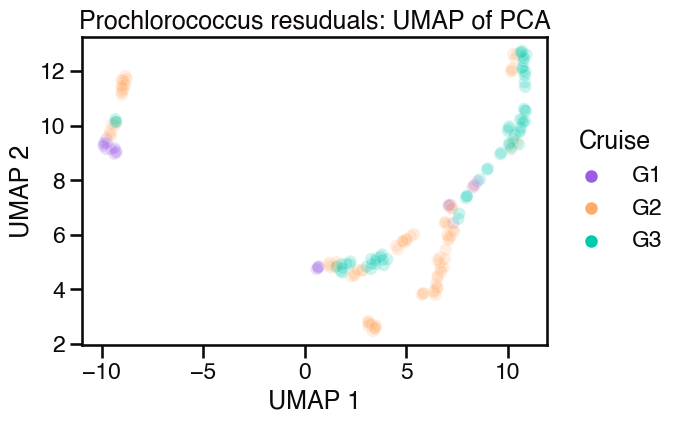

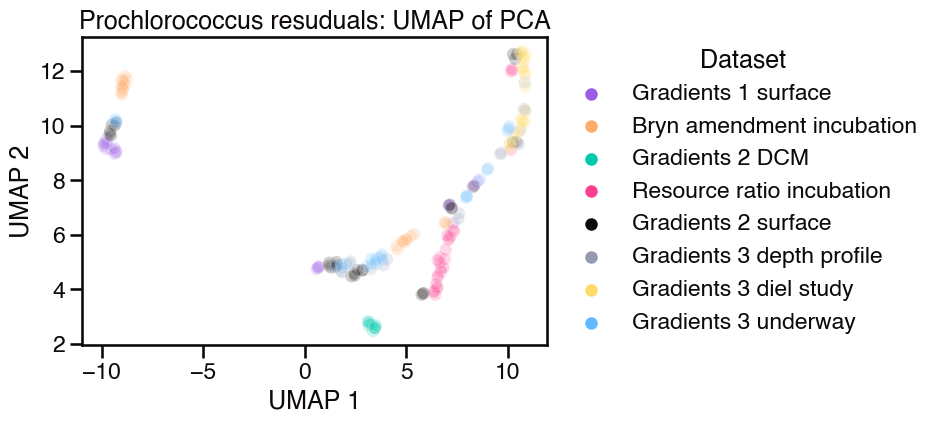

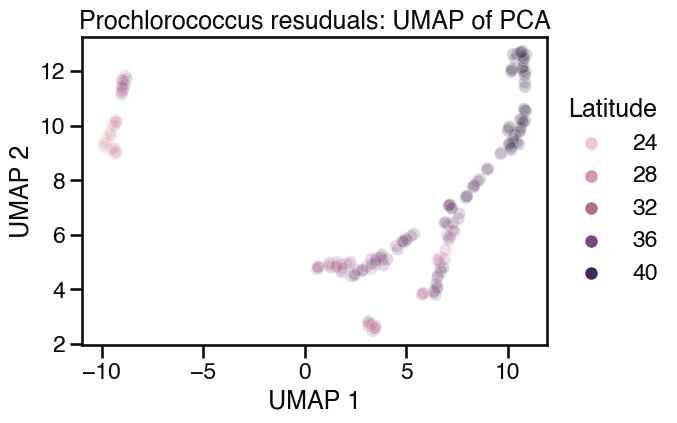

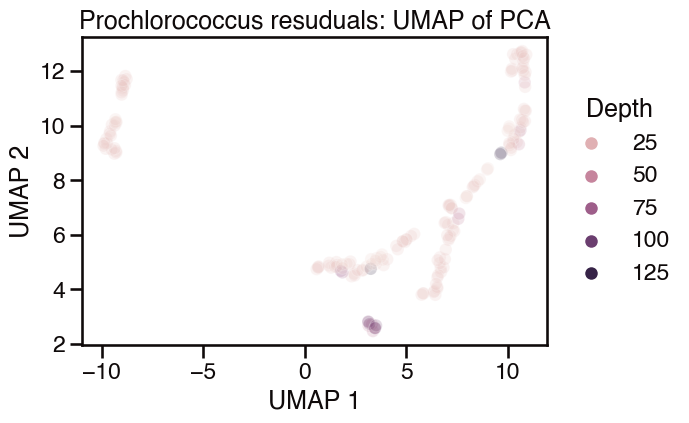

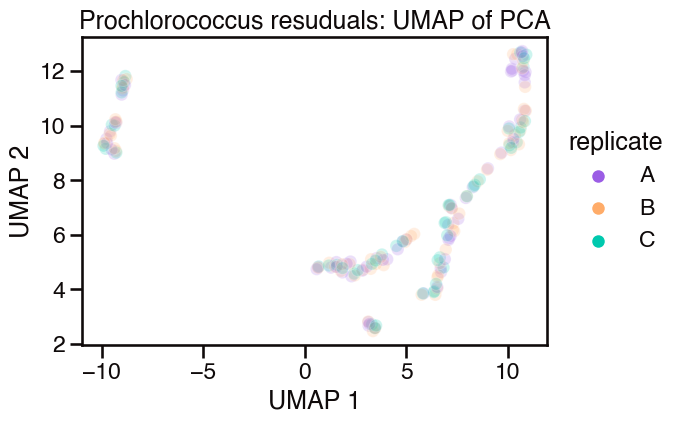

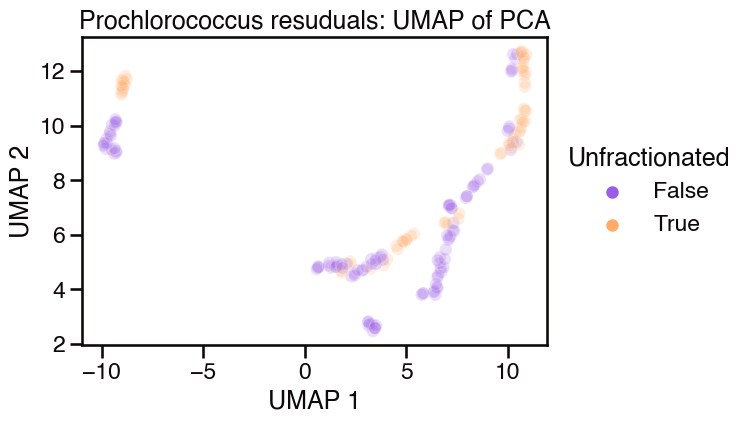


Synechococcus



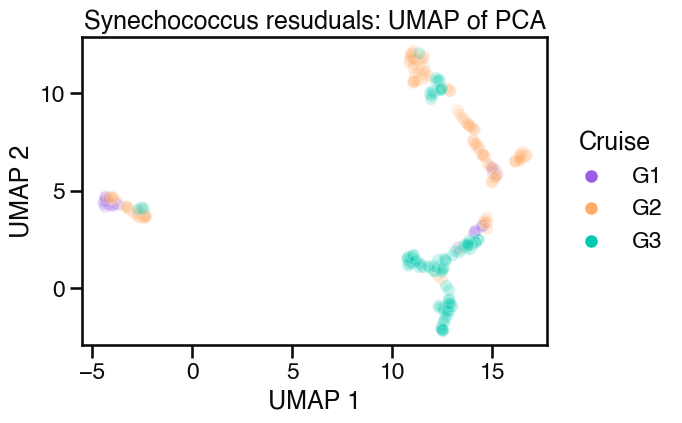

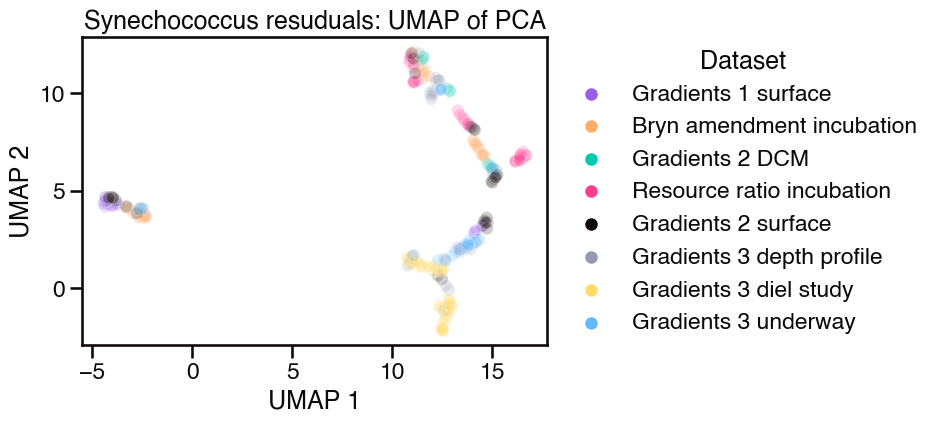

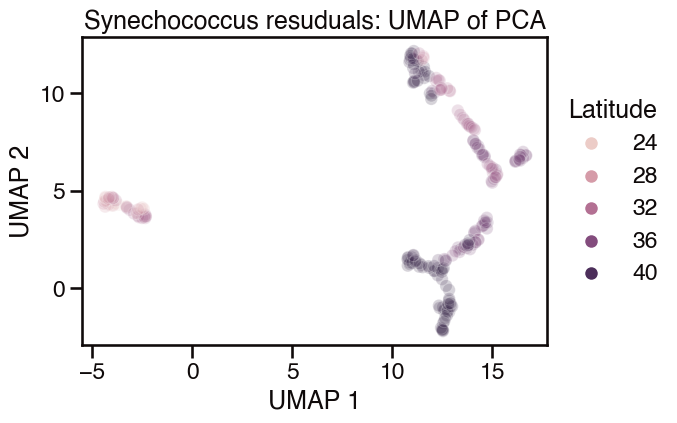

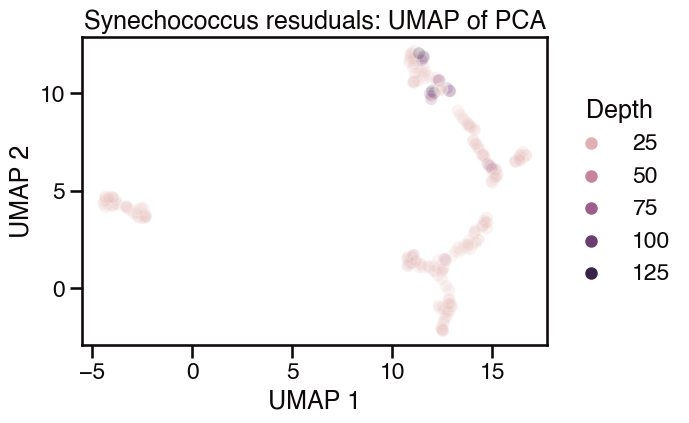

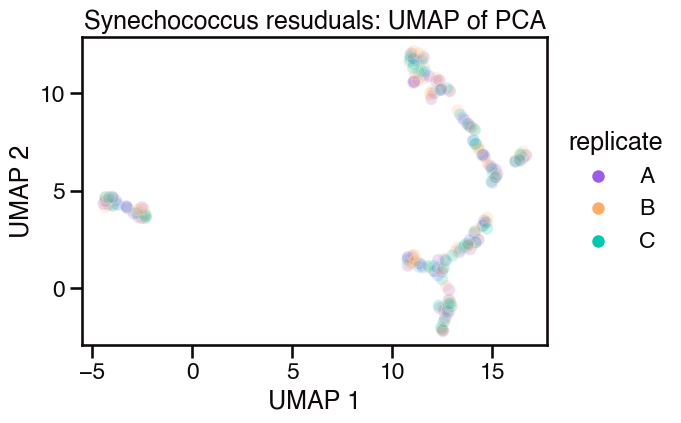

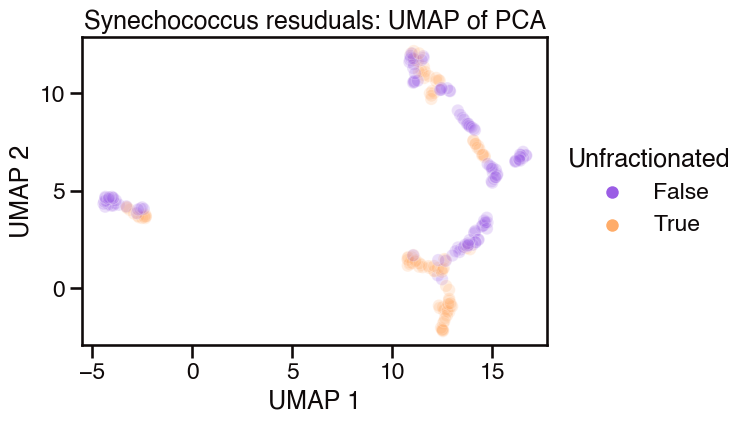

In [71]:
# plot dimensionality-reduced data

# variables = ['clade', 'Cruise', 'Dataset', 'Latitude', 'Depth', 'replicate', 'Unfractionated']
variables = ['Cruise', 'Dataset', 'Latitude', 'Depth', 'replicate', 'Unfractionated']

# plot both datasets
for genus in ['Prochlorococcus', 'Synechococcus']:
    print('\n{}\n'.format(genus))
    plot_df = reduced_dfs[genus]
    
    # plot each variable
    for var in variables:
        fig, ax = plt.subplots(figsize=(6, 4))
        sns.scatterplot(x=0, y=1, hue=var, alpha=0.2, data=plot_df, ax=ax)
        plt.title('{} resuduals: UMAP of PCA'.format(genus))
        plt.legend(title=var, loc='center left', bbox_to_anchor=[1, 0.5]);
        plt.xlabel('UMAP 1')
        plt.ylabel('UMAP 2')
        plt.show()
